In [39]:
import cv2
import numpy as np
import random
import os
import math
import matplotlib.pyplot as plt
imgsPath='imgs'

imgs=[]
edges_imgs=[]
#Reading and Adding images
for path in os.listdir(imgsPath):
    print(os.path.join(imgsPath,path))

    img=cv2.imread(os.path.join(imgsPath,path))
    
    arrayTemp=np.array(img.shape[:-1])*0.4

    W,H=int(arrayTemp[0]),int(arrayTemp[1])

    img=cv2.resize(img,(H,W))

    # 1. Convert to gray & denoise
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # 2. Outline extraction with Canny
    edges = cv2.Canny(blur, 10, 200)

    imgs.append(img)
    edges_imgs.append(edges)


imgs\1.jpg
imgs\2.jpg
imgs\3.jpg
imgs\4.jpg
imgs\5.jpg
imgs\6.jpg


In [40]:
def convertCoordinates(rho,theta):
    x0=rho*np.cos(theta)
    y0=rho*np.sin(theta)

    a=np.cos(theta)
    b=np.sin(theta)

    x1=int(x0+1000*(-b))
    y1=int(y0+1000*(a))
    x2=int(x0-1000*(-b))
    y2=int(y0-1000*(a))

    return (x1,y1),(x2,y2)

def convertDegree(thetas):
    alpha=thetas - np.pi/2
    return np.abs(np.degrees(alpha))

# Draw function and log function (For detailing)
def draw(img,lines):
    colors=[(random.randint(10,255),random.randint(20,255),random.randint(30,255)) for i in range(len(lines))]
    img_c=img.copy()

    for i in range(len(lines)):
        rho=lines[i][0][0]
        theta=lines[i][0][1]

        (x1,y1),(x2,y2)=convertCoordinates(rho,theta)

        print(f"p: {rho}; theta: {theta}")
        cv2.line(img_c,(x1,y1),(x2,y2),colors[i],5)
        plt.imshow(img_c)
        plt.show()

Showing the last test images 

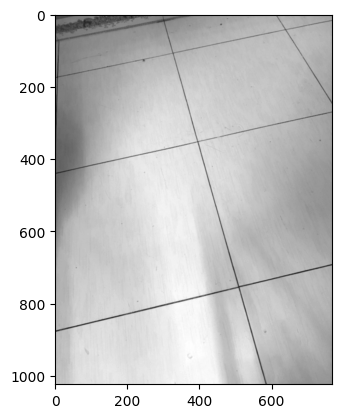

In [41]:
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(blur)
plt.show()

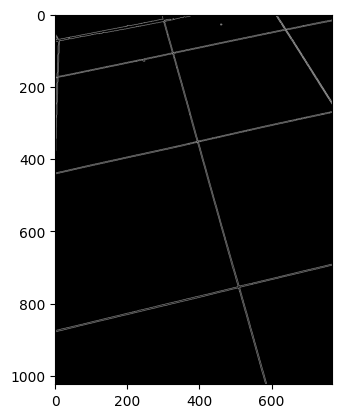

In [42]:
plt.imshow(edges)

In [43]:
lines_imgs=[]
countFails=0
path='results/Temp'
edges_imgs_=edges_imgs.copy()
for pos,edges in enumerate(edges_imgs_):
    lines=[]
    lines=cv2.HoughLines(edges, 1,np.pi/180,240)
    if lines is None:
        print(f"Can't find lines of image number {pos+1}")
        print('Image Error: ')
        plt.imshow(imgs[pos])
        countFails+=1

    img=imgs[pos]

    if lines is not None:

        lines_imgs.append(lines)
        img_c=img.copy()
        
        for i in range(len(lines)):
            rho=lines[i][0][0]
            theta=lines[i][0][1]

            x0=rho*np.cos(theta)
            y0=rho*np.sin(theta)

            a=np.cos(theta)
            b=np.sin(theta)

            x1=int(x0+1000*(-b))
            y1=int(y0+1000*(a))
            x2=int(x0-1000*(-b))
            y2=int(y0-1000*(a))

            cv2.line(img_c,(x1,y1),(x2,y2),(255,0,0),2)

        print(f'Saved result of image {pos+1} at {path}/{pos+1}.jpg')
        cv2.imwrite(f'{path}/{pos+1}.jpg',img_c)


if countFails: print(f'There are {countFails} images failed!')
else: print('All passed!')

Saved result of image 1 at results/Temp/1.jpg
Saved result of image 2 at results/Temp/2.jpg
Saved result of image 3 at results/Temp/3.jpg
Saved result of image 4 at results/Temp/4.jpg
Saved result of image 5 at results/Temp/5.jpg
Saved result of image 6 at results/Temp/6.jpg
All passed!


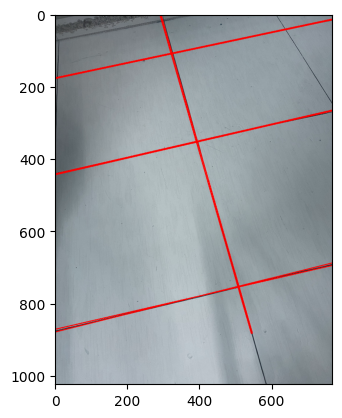

In [44]:
plt.imshow(img_c)

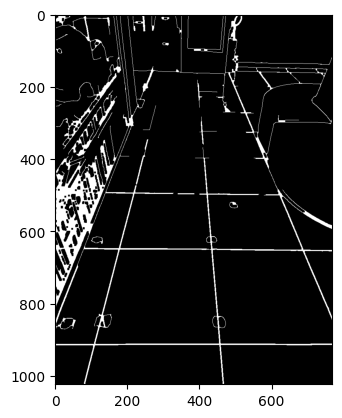

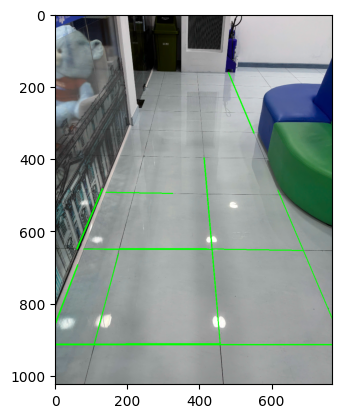

In [74]:
import cv2, numpy as np

img_c=imgs[-5].copy()
gray = cv2.cvtColor(img_c, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

edges_a = cv2.Canny(blur, 40, 120)

kernel = np.ones((3,3), np.uint8)
edges_a = cv2.morphologyEx(edges_a, cv2.MORPH_CLOSE, kernel, iterations=2)

plt.imshow(edges_a)
plt.show()
# Chỉ giữ nửa dưới khung hình
# h = edges_a.shape[0]
# edges_a[:h//3,:] = 0

tile_px=200
# (2) HoughLinesP đã được “tune”
linesP = cv2.HoughLinesP(edges_a,
             rho           = 1,
             theta         = np.pi/180,      # 1°
             threshold     = 140,            # thử 80–120
             minLineLength = int(0.8*tile_px),
             maxLineGap    = 0.5)

# (3) Vẽ & lấy góc
angles = []
if linesP is not None:
    for (x1,y1,x2,y2) in linesP[:,0]:
        # vẽ
        cv2.line(img_c,(x1,y1),(x2,y2),(0,255,0),2)
        # góc (đổi dấu dy nếu trục y của ảnh hướng xuống)
        ang = np.arctan2(-(y2-y1), x2-x1)
        angles.append(ang)
        plt.imshow(img_c)
plt.show()

# (4) Lấy hai vạch “trái–phải” bằng cụm hoá góc (±5°)
groups = {}
for a in angles:
    key = round(a/0.087, 0)  # 0.087 ≈ 5° rad
    groups.setdefault(key, []).append(a)

if len(groups) == 2:
    alpha1 = np.mean(groups[list(groups.keys())[0]])
    alpha2 = np.mean(groups[list(groups.keys())[1]])
    heading = (alpha1 + alpha2)/2


In [35]:
groups

{-15.0: [-1.2946368464376425,
  -1.2946993073994602,
  -1.294418818233698,
  -1.2935707812327786,
  -1.2949262062553994,
  -1.2933453238802473,
  -1.2940603881727815,
  -1.2946993073994602,
  -1.2942823801774226],
 2.0: [0.207889927202263,
  0.20768253290719707,
  0.18971950684737615,
  0.2049999760035741,
  0.19222764720107577,
  0.18889718087762267],
 3.0: [0.23962396196288266,
  0.22447572657312903,
  0.22413337235842967,
  0.23109066719589708,
  0.24183895601830027,
  0.23996617377864618,
  0.2196141251765998,
  0.2405342479459046,
  0.22082876972934834,
  0.24061664062924787,
  0.22208190190548016],
 -12.0: [-1.0125639839119251, -1.010379492551162],
 18.0: [1.5372723058458424, 1.5359845253290239]}

In [ ]:
countFails=0
path='results/Temp2'
colors_imgs=[]

for pos,lines_filtered in enumerate(lines_filtered_imgs):

    img=imgs[pos]

    if lines_filtered is not None:

        colors=[(random.randint(10,255),random.randint(20,255),random.randint(30,255)) for i in range(len(lines_filtered))]
        img_c=img.copy()

        for i in range(len(lines_filtered)):
            rho=lines_filtered[i][0][0]
            theta=lines_filtered[i][0][1]

            x0=rho*np.cos(theta)
            y0=rho*np.sin(theta)

            a=np.cos(theta)
            b=np.sin(theta)

            x1=int(x0+1000*(-b))
            y1=int(y0+1000*(a))
            x2=int(x0-1000*(-b))
            y2=int(y0-1000*(a))
            cv2.line(img_c,(x1,y1),(x2,y2),colors[i],5)

        colors_imgs.append(colors)
        print(f'Saved result of image {pos+1} at {path}/{pos+1}.jpg')
        cv2.imwrite(f'{path}/{pos+1}.jpg',img_c)

if countFails: print(f'There are {countFails} images failed!')
else: print('All passed!')

Saved result of image 1 at results/Temp2/1.jpg
Saved result of image 2 at results/Temp2/2.jpg
Saved result of image 3 at results/Temp2/3.jpg
Saved result of image 4 at results/Temp2/4.jpg
Saved result of image 5 at results/Temp2/5.jpg
Saved result of image 6 at results/Temp2/6.jpg
All passed!


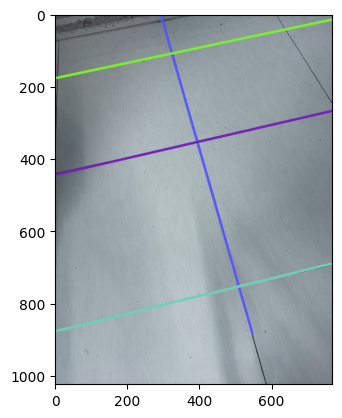

In [ ]:
lines_filtered=lines_filtered_imgs[-1]
img=imgs[-1]
if lines_filtered is not None:

    colors=[(random.randint(10,255),random.randint(20,255),random.randint(30,255)) for i in range(len(lines_filtered))]
    img_c=img.copy()

    for i in range(len(lines_filtered)):
        rho=lines_filtered[i][0][0]
        theta=lines_filtered[i][0][1]

        x0=rho*np.cos(theta)
        y0=rho*np.sin(theta)

        a=np.cos(theta)
        b=np.sin(theta)

        x1=int(x0+1000*(-b))
        y1=int(y0+1000*(a))
        x2=int(x0-1000*(-b))
        y2=int(y0-1000*(a))
        cv2.line(img_c,(x1,y1),(x2,y2),colors[i],5)
    plt.imshow(img_c)

Getting the direction

Calcualte angle of the last line (Take for example)

In [ ]:
taken_line=lines_filtered_imgs[-3]
taken_img=imgs[-3].copy()
taken_line=np.array(taken_line).reshape(len(taken_line),2)

In [ ]:
taken_line

array([[ 6.6225000e+02,  1.5707964e+00],
       [ 3.5475000e+02,  8.7266460e-02],
       [-4.2450000e+02,  2.9146998e+00],
       [ 4.6850000e+02,  1.5707964e+00],
       [ 2.2100000e+02,  4.3633232e-01],
       [ 1.0035000e+03,  1.5577065e+00],
       [-4.6300000e+02,  2.6529005e+00]], dtype=float32)

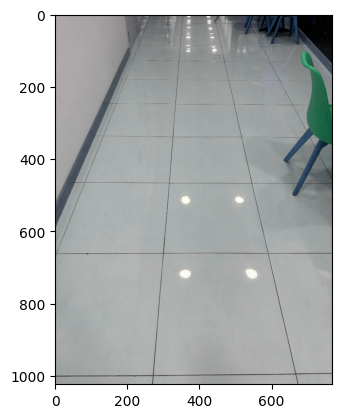

In [ ]:
plt.imshow(taken_img)

p: 662.25; theta: 1.5707963705062866


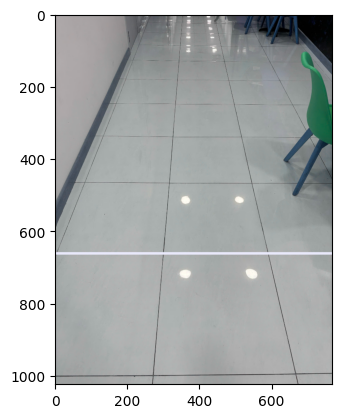

p: 354.75; theta: 0.0872664600610733


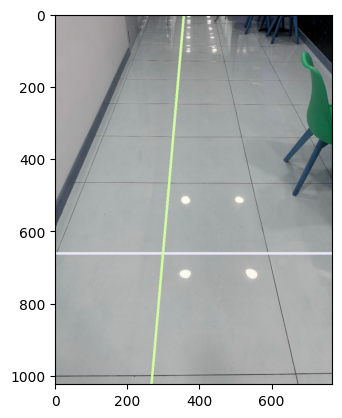

p: -424.5; theta: 2.9146997928619385


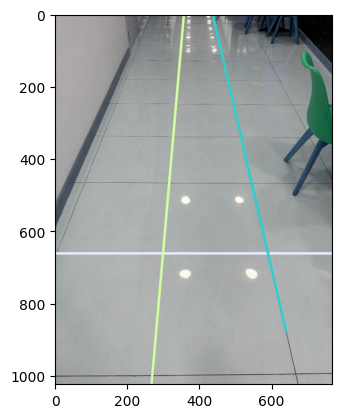

p: 468.5; theta: 1.5707963705062866


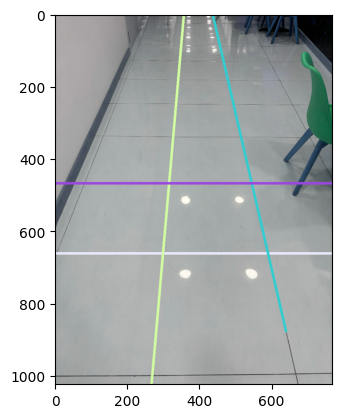

p: 221.0; theta: 0.4363323152065277


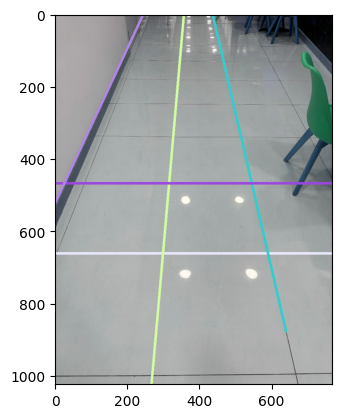

p: 1003.5; theta: 1.5577064752578735


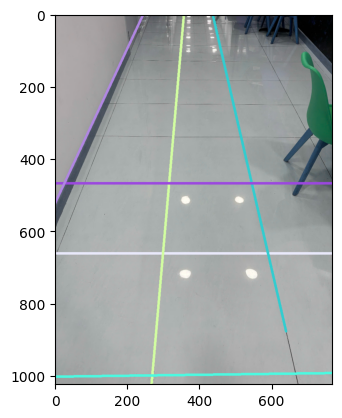

p: -463.0; theta: 2.652900457382202


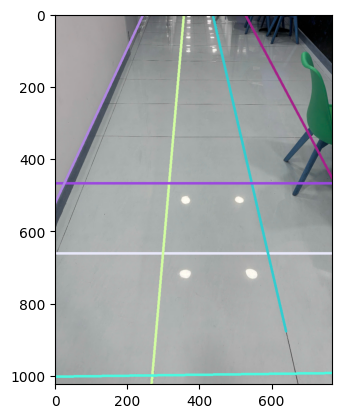

In [ ]:
draw(taken_img,taken_line.reshape(len(taken_line),1,2))

In [ ]:
thetas=taken_line[:,1]
rhos=taken_line[:,0]

In [ ]:
# Calculate the intercepts of x_axis and y_axis of each lines to determnine delta_x and delta_y for arctan2 formula
# x_intercept=p/cos(theta) ; y_intercept=p/sin(theta)
# 2 coordinates from x_axis and y_axis intercepts; x_axis_intercept => (x_intercept,0) ; y_axis_intercept => (0,y_intercept)
x_intercepts=rhos/np.cos(thetas)
y_intercepts=rhos/np.sin(thetas)

delta_x= 
delta_y=...

arctan2=...

In [ ]:
endPoints[4]

477.49905

In [ ]:
# Setting the line of the corrected line and the actual line
correctedTheta=0
actualTheta = np.abs(math.radians(averageAngle))-np.pi/2

In [ ]:
actualTheta # The angle of the robot based on tiles' vertical lines

-0.30979594222899354

Actual INFS: theta: p: 384; theta: -0.30979594222899354
Corrected INFS: theta: p: 384; theta: 0


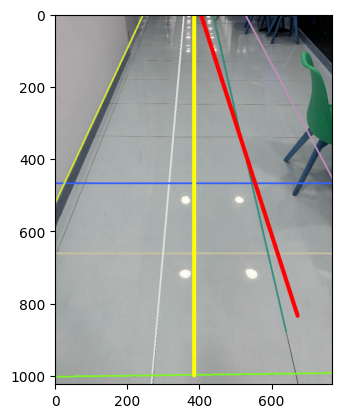

In [ ]:
colors=[(random.randint(10,255),random.randint(20,255),random.randint(30,255)) for i in range(len(taken_line))]
img_c=taken_img.copy()

for i in range(len(taken_line)):
    rho=taken_line[i][0]
    theta=taken_line[i][1]
    (x1,y1),(x2,y2)=convertCoordinates(rho,theta)
    cv2.line(img_c,(x1,y1),(x2,y2),colors[i],3)

# Draw the actual and corrected lines

rho_base=taken_img.shape[:-1][1]//2 #Setting the p value to be the center of x-axis

# Actual
(x1,y1),(x2,y2)=convertCoordinates(rho_base,actualTheta)
cv2.line(img_c,(x1,y1),(x2,y2),(255,0,0),10) #RED

# Corrected
(x1,y1),(x2,y2)=convertCoordinates(rho_base,correctedTheta)
cv2.line(img_c,(x1,y1),(x2,y2),(255,255,0),10) #YELLOW

print(f'Actual INFS: theta: p: {rho_base}; theta: {actualTheta}')
print(f'Corrected INFS: theta: p: {rho_base}; theta: {correctedTheta}')

plt.imshow(img_c)
plt.show()

Apply to camera first to see the differences

Next task: calculate the avg line (done), avg left and avg right angles. Furthermore, find way to display the angles in opencv.